# Setting Up

In [13]:
!nvidia-smi

Sun Feb 14 07:42:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    27W /  70W |  14614MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
!git clone https://github.com/soumik12345/MIRNet
%cd MIRNet

Cloning into 'MIRNet'...
remote: Enumerating objects: 248, done.
remote: Counting objects: 100% (248/248), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 248 (delta 113), reused 166 (delta 46), pack-reused 0
Receiving objects: 100% (248/248), 28.12 MiB | 19.07 MiB/s, done.
Resolving deltas: 100% (113/113), done.
/content/MIRNet


In [2]:
!pip install -q wandb

     |████████████████████████████████| 2.0MB 9.2MB/s 
     |████████████████████████████████| 102kB 13.4MB/s 
     |████████████████████████████████| 102kB 13.8MB/s 
     |████████████████████████████████| 163kB 50.8MB/s 
     |████████████████████████████████| 71kB 11.1MB/s 


In [3]:
from glob import glob
from PIL import Image
from matplotlib import pyplot as plt
from mirnet.inference import Inferer
from mirnet.utils import download_dataset, plot_result

import tensorflow as tf
import numpy as np
print(tf.__version__)

2.4.1


In [4]:
inferer = Inferer()
inferer.download_weights('1sUlRD5MTRKKGxtqyYDpTv7T3jOW6aVAL')
inferer.build_model(
    num_rrg=3, num_mrb=2, channels=64,
    weights_path='low_light_weights_best.h5'
)

Downloading...
From: https://drive.google.com/uc?id=1sUlRD5MTRKKGxtqyYDpTv7T3jOW6aVAL
To: /content/MIRNet/low_light_weights_best.h5
148MB [00:01, 111MB/s] 


In [5]:
inferer.model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 6 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, None, None, 6 36928       conv2d_1[0][0]                   
______________________________________________________________________________________________

In [6]:
inferer.model.save('mirnet')

INFO:tensorflow:Assets written to: mirnet/assets


In [8]:
inferer.model.save('mirnet-save.h5')

# 256*256 Image

In [16]:
IMAGE_LOC = '/content/image3.jpg'

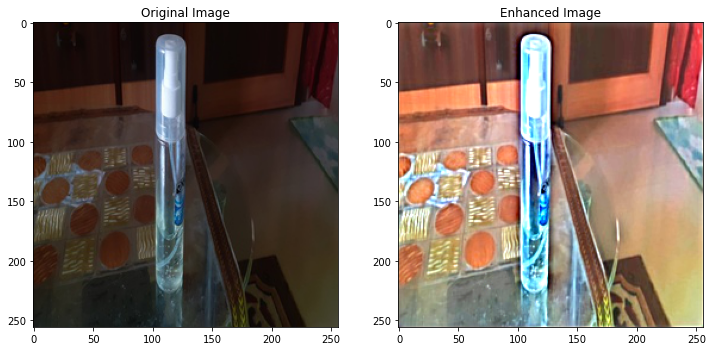

In [17]:
original_image, output_image = inferer.infer(IMAGE_LOC)
plot_result(original_image, output_image)

# On 128*128 image

In [18]:
IMAGE_LOC = '/content/image4.jpg'

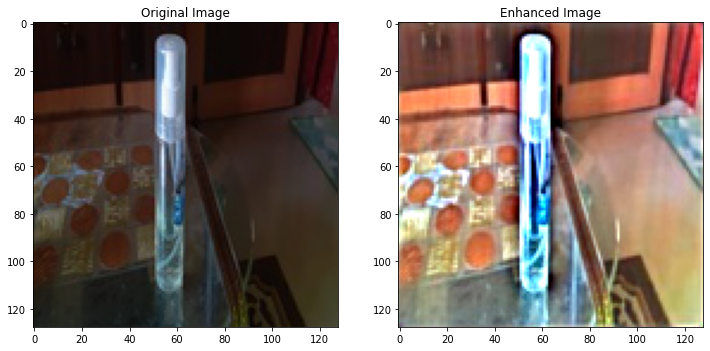

In [19]:
original_image, output_image = inferer.infer(IMAGE_LOC)
plot_result(original_image, output_image)

# On 1600*1000

In [20]:
IMAGE_LOC = '/content/image5.jpg'

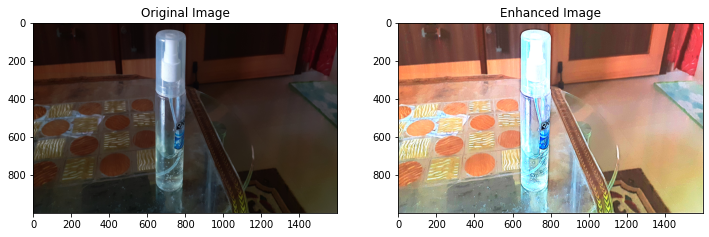

In [21]:
original_image, output_image = inferer.infer(IMAGE_LOC)
plot_result(original_image, output_image)

# On 1100*600

In [22]:
IMAGE_LOC = '/content/image6.JPEG'

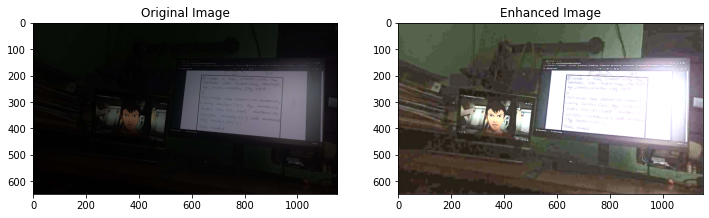

In [23]:
original_image, output_image = inferer.infer(IMAGE_LOC)
plot_result(original_image, output_image)

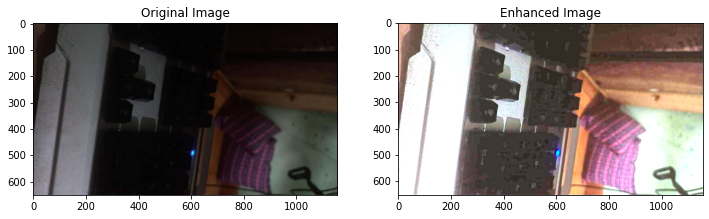

In [24]:
IMAGE_LOC = '/content/image7.JPEG'
original_image, output_image = inferer.infer(IMAGE_LOC)
plot_result(original_image, output_image)

### By Sayan Nath